In [1]:
"""
<Python 문서 전체 설명>
전체 순서: 1. 데이터 읽기 / 2. 데이터셋 준비하기 / 3. 데이터셋 분할하기

"""


'\n<Python 문서 전체 설명>\n전체 순서: 1. 데이터 읽기 / 2. 데이터셋 준비하기 / 3. 데이터셋 분할하기\n\n'

### 1. 데이터 읽기


In [2]:
# warning 제거
import warnings
warnings.filterwarnings('ignore')

# 필요 라이브러리 가져오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os


In [3]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")
print(file_paths)


총 9개의 CSV 파일을 발견했습니다.
['c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\audi.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\bmw.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\ford.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\hyundai.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\merc.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\skoda.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\toyota.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vauxhall.csv', 'c:\\Users\\a\\OneDrive\\Documents\\GitHub\\Chagawa/used_car copy\\vw.csv']


In [4]:
# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)
    

c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\audi.csv 파일 읽기 완료. 데이터 크기: (10668, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\bmw.csv 파일 읽기 완료. 데이터 크기: (10781, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\ford.csv 파일 읽기 완료. 데이터 크기: (17965, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
c:\Users\a\OneDrive\Documents\GitHub\Chagawa/used_car copy\vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)


In [5]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")
    

병합된 데이터 크기: (99187, 11)


In [6]:
# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())


데이터의 첫 5행 미리보기:
  model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150.0  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20.0  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30.0  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145.0  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145.0  49.6         1.0   

              carMake  tax(£)  
0  used_car copy\audi     NaN  
1  used_car copy\audi     NaN  
2  used_car copy\audi     NaN  
3  used_car copy\audi     NaN  
4  used_car copy\audi     NaN  


In [7]:
# full_data 내보내기
# full_data.to_csv('full_data.csv', index=False) # 파일 실행마다 파일 생성을 방지하기 위해 주석 처리


### 2. full_data 데이터셋 준비하기: 전처리


In [8]:
# 명목형 변수 값의 공백을 삭제
str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
for i in str_list:
    full_data[i] = full_data[i].str.strip()
print(full_data['model'].unique()[:20])


['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5']


In [9]:
# tax열 결측값 제거: tax 와 tax(£) 컬럼 합치기
full_data['tax'].fillna(full_data['tax(£)'], inplace=True)
full_data.drop(columns='tax(£)', inplace=True)
full_data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
carMake         0
dtype: int64

In [12]:
## 이상치 제거


In [ ]:
# 모델 별로 정상범위와 이상치를 확인하기: boxplot 그리기
unique_model = full_data['model'].unique()
count_nums=0
for i in unique_model:
    model_year = full_data[full_data['model'] == i]['year']
    if any(x < 2000 for x in model_year):
        count_nums += 1
        year_before_2000 = [x for x in model_year if x < 2000]
        print(f'model name:{i}, count:{len(model_year)}')
        print(f'2000년 이전 year 수:{len(year_before_2000)}')
        plt.boxplot(model_year)
        plt.show()
    elif any(x > 2020 for x in model_year):
        count_nums += 1
        year_after_2020 = [x for x in model_year if x > 2020]
        print(f'model name:{i}, count:{len(model_year)}')
        print(f'2000년 이후 year 수:{len(year_before_2000)}')
        plt.boxplot(model_year)
        plt.show()
print(f'count_nums:{count_nums}')

In [ ]:
# year별 개수 세기
full_data_cnt = full_data.groupby(by='year').agg('count')
full_data_cnt


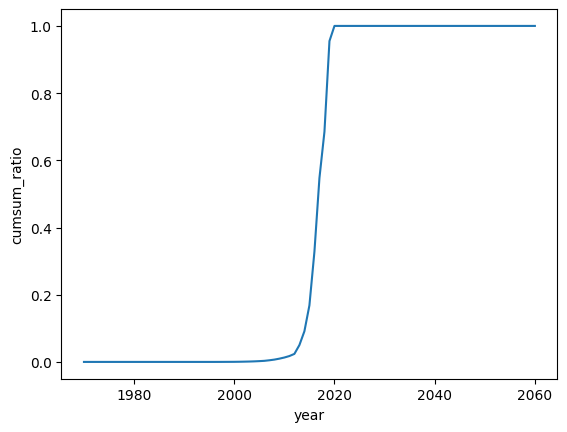

In [11]:
# year의 누적합과, 누적비율을 세기: 2014년으로 결정, 데이터의 95% 확인할 수 있음
full_data_cnt['cumsum'] = full_data_cnt['model'].cumsum()
full_data_cnt['cumsum_ratio'] = full_data_cnt['cumsum'] / 99187
full_data_cnt[['model', 'cumsum', 'cumsum_ratio']]
sns.lineplot(data=full_data_cnt, x='year', y='cumsum_ratio')
plt.show()


In [ ]:
# year 범위 설정: 2014 이상 2020년 이하
# full_data = full_data[(full_data['year'] >= 2014) &(full_data['year'] <= 2020)]


In [ ]:
# IQR 기준으로 year 이상치 탐지
Q1 = full_data["year"].quantile(0.25)
Q3 = full_data["year"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = full_data[(full_data["year"] < lower_bound) | (full_data["year"] > upper_bound)]
print(outliers)

In [ ]:
# year boxplot 그려보기
plt.boxplot(full_data['year'])
plt.show()
full_data['year'].describe()


In [15]:
## 명목형 변수 인코딩
# 명목변수 = ['model', 'transmission', 'fuelType', 'carMake']

# 라벨 인코딩 => 빈도 인코딩
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
incoding_df = full_data.copy()
incoding_df['model'] = LE.fit_transform(incoding_df['model'])


In [16]:
# 원 핫 인코딩
incoding_df = pd.get_dummies(incoding_df, columns = ['transmission', 'fuelType', 'carMake'])
incoding_df.head()


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_used_car copy\audi,carMake_used_car copy\bmw,carMake_used_car copy\ford,carMake_used_car copy\hyundai,carMake_used_car copy\merc,carMake_used_car copy\skoda,carMake_used_car copy\toyota,carMake_used_car copy\vauxhall,carMake_used_car copy\vw
0,13,2017,12500,15735,150.0,55.4,1.4,False,True,False,...,True,True,False,False,False,False,False,False,False,False
1,18,2016,16500,36203,20.0,64.2,2.0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,13,2016,11000,29946,30.0,55.4,1.4,False,True,False,...,True,True,False,False,False,False,False,False,False,False
3,16,2017,16800,25952,145.0,67.3,2.0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,15,2019,17300,1998,145.0,49.6,1.0,False,True,False,...,True,True,False,False,False,False,False,False,False,False


In [17]:
# 독립변수가 여러개라서 변수간의 상관성 확인 필요-> 상관분석
num_colums = full_data._get_numeric_data().columns.tolist()
correlation_matrix = full_data[num_colums].corr()
sns.pairplot(full_data[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

KeyboardInterrupt: 